In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam

In [ ]:
def fen_to_one_hot_board(fen):
    rows = fen.split(" ")[0].split("/")
    board = np.zeros((8, 8, 12), dtype=int)

    for i, row in enumerate(rows):
        j = 0
        for char in row:
            if char.isdigit():
                j += int(char)
            else:
                figure = char.lower()
                color = 0 if char.isupper() else 1
                figure_idx = 'prnbqk'.index(figure)
                board[i, j, 2 * figure_idx + color] = 1
                j += 1
    return board

def move_to_index(move, board_size=8):
    start = move[:2]
    end = move[2:]

    start_idx = (int(start[1]) - 1) * board_size + (ord(start[0]) - ord('a'))
    end_idx = (int(end[1]) - 1) * board_size + (ord(end[0]) - ord('a'))

    return end_idx

df = pd.read_csv('fens_training_set.csv')
X = np.array([fen_to_one_hot_board(fen) for fen in df['fen']])
y = np.array([move_to_index(move) for move in df['move']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("размерность X (доски):", X.shape)
print("размерность y (ходы):", y.shape)

размерность X (доски): (268550, 8, 8, 12)
размерность y (ходы): (268550,)


In [ ]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(8, 8, 12)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='softmax')
])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 6, 6, 64)       │         6,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 1, 1, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,600 (412.50 KB)

 Trainable params: 105,600 (412.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

def lr_schedule(epoch, lr):
    if epoch > 10:
        return lr * 0.9
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_scheduler])

Epoch 1/50
6714/6714 ━━━━━━━━━━━━━━━━━━━━ 64s 9ms/step - accuracy: 0.1128 - loss: 3.5753 - val_accuracy: 0.1979 - val_loss: 3.1427 - learning_rate: 0.0010
Epoch 2/50
6714/6714 ━━━━━━━━━━━━━━━━━━━━ 56s 8ms/step - accuracy: 0.2165 - loss: 3.0543 - val_accuracy: 0.2207 - val_loss: 3.0226 - learning_rate: 0.0010
Epoch 3/50
6714/6714 ━━━━━━━━━━━━━━━━━━━━ 53s 8ms/step - accuracy: 0.2413 - loss: 2.9189 - val_accuracy: 0.2288 - val_loss: 2.9747 - learning_rate: 0.0010
Epoch 4/50
6714/6714 ━━━━━━━━━━━━━━━━━━━━ 83s 8ms/step - accuracy: 0.2551 - loss: 2.8447 - val_accuracy: 0.2368 - val_loss: 2.9469 - learning_rate: 0.0010
Epoch 5/50
6714/6714 ━━━━━━━━━━━━━━━━━━━━ 54s 8ms/step - accuracy: 0.2655 - loss: 2.7870 - val_accuracy: 0.2388 - val_loss: 2.9359 - learning_rate: 0.0010
Epoch 6/50
6714/6714 ━━━━━━━━━━━━━━━━━━━━ 52s 8ms/step - accuracy: 0.2727 - loss: 2.7426 - val_accuracy: 0.2468 - val_loss: 2.9124 - learning_rate: 0.0010
Epoch 7/50
6714/6714 ━━━━━━━━━━━━━━━━━━━━ 50s 7ms/step - accuracy: 0.2

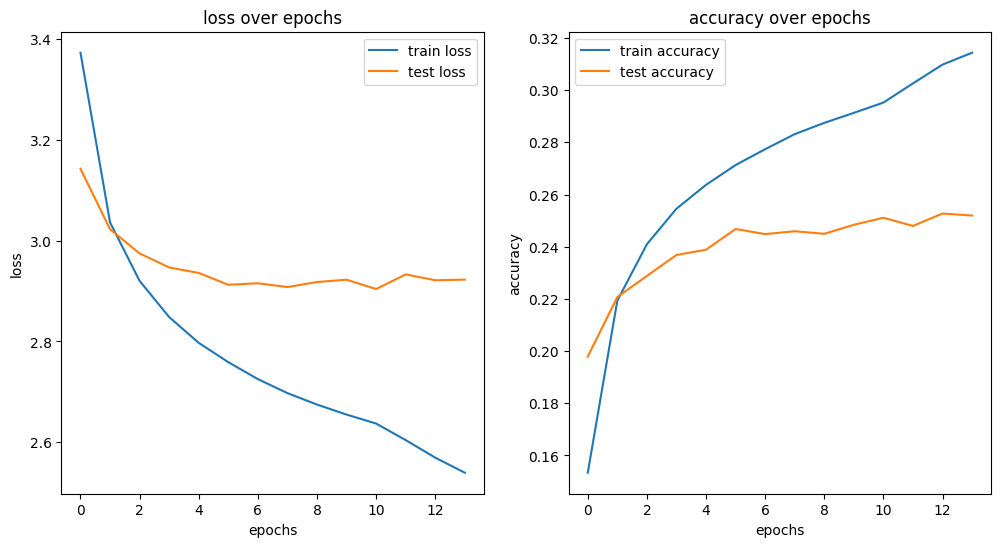

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title('loss over epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.title('accuracy over epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test Accuracy: {test_accuracy:.4f}, test Loss: {test_loss:.4f}')

1679/1679 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2527 - loss: 2.8969
test Accuracy: 0.2511, test Loss: 2.9040
